# Financial Analytics - Doubler bettor

This notebook provides introduces Monte Carlo simulation scenario with double betting strategy (doubles bet after loss) described as a Roulette game.

In [1]:
import random
import matplotlib.pyplot as plt

Define a function, which will randomly generate an integer from the (1,37) range. If that number is from the range [1,18] then you win, else you loose. Comparing to the Roulette game, [1,18] can be considered as the black patterns, [19,36] as the red, and 37 as the green one, while we are betting on black.

In [2]:
def spinner():
    slot = random.randint(1,37)
    if slot == 37:
        return False
    elif slot <= 18:
        return True
    elif 19<=slot<=36:
        return False

Now let's use the function above to create a "Doubler bettor". The latter always bets the same amount of money (bet_amount) for several periods (periods) if wins, and doublet the bet amount in case of loosing. given the initial budget s/he has (budget). If s/he wins, the budget increases by the amount of bet, otherwise it decreases. The game stops in one of the two cases: either budget becomes 0 and bettor is not able to bet anymore, or the number of periods the bettor decided to play comes to its end.

We want to plot all this values using matplotlib, which means we should have the X_axis and Y_axis of the plot defined. X_axis will show the periods, while Y_axis will show the budget at the given period. For that purpose we will create an empty list for each axis to be appended with values after each period. 

In [7]:
def doubler_bettor(budget,bet_amount,periods):
    current_bet = bet_amount
    X_axis = []
    Y_axis = []
    currentPeriod = 1

    # since we'll be doubling, we are interested in previous values
    # for the first period previousBet is considered win
    previousBet = 'win'
    # for the first period previousBetAmount is the bet_amount
    previousBetAmount = bet_amount

    while currentPeriod <= periods:
        # win case => bet the initial amount
        if previousBet == 'win':
            # which means we won the last round
            if spinner()==True:
                budget = budget + current_bet
                X_axis.append(currentPeriod)
                Y_axis.append(budget)
            elif spinner()==False:
                budget = budget - current_bet
                previousBet = 'loss'
                previousBetAmount = current_bet
                X_axis.append(currentPeriod)
                Y_axis.append(budget)
                
        # loss case => bet the doubled amount
        elif previousBet == 'loss':
            # which means we lost the last round
            if spinner()==True:
                current_bet = previousBetAmount * 2
                budget = budget + current_bet
                current_bet = bet_amount
                previousBet = 'win'
                X_axis.append(currentPeriod)
                Y_axis.append(budget)
            elif spinner()==False:
                current_bet = previousBetAmount * 2
                budget = budget - current_bet
                previousBet = 'loss'
                previousBetAmount = current_bet
                X_axis.append(currentPeriod)
                Y_axis.append(budget)

        currentPeriod = currentPeriod + 1

    plt.plot(X_axis,Y_axis)

Now, given the doubler_bettor() function above, let's run it for several times to simulate different possible futures. And this is what Monte Carlo simulation is doing: simulating many different possible futures.

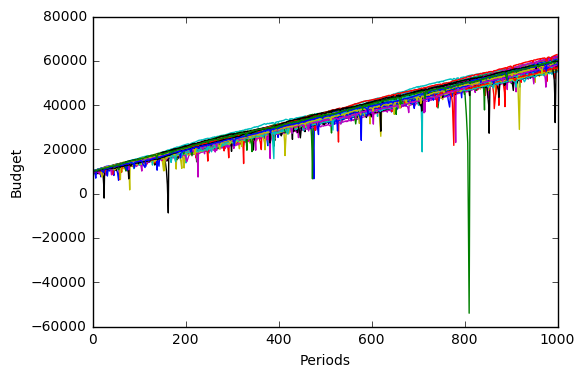

In [8]:
bettors=0
while bettors < 100:
    doubler_bettor(10000,100,1000)
    bettors = bettors + 1

plt.ylabel('Budget')
plt.xlabel('Periods')
plt.show()